<a href="https://colab.research.google.com/github/klausreitz/cohid/blob/main/LLM_EXCEL_QUERY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/alura-cursos/llamaIndex_pandas_query/refs/heads/main/Dados/vendas.csv'

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [6]:
from google.colab import userdata
key = userdata.get('GROQ_API_KEY')

In [7]:
!pip install llama-index-llms-groq -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 14.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [8]:
!pip install llama-index llama-index-experimental -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.8/442.8 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.3/191.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.3/213.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model='llama-3.3-70b-versatile', api_key=key)

In [10]:
from llama_index.experimental.query_engine import PandasQueryEngine

In [11]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [12]:
df.groupby('filial')['forma_pagamento'].apply(lambda x: x.mode().iloc[0])

,forma_pagamento
filial,
A,Carteira Digital
B,Carteira Digital
C,Dinheiro


In [13]:
df.groupby('filial')['genero'].apply(lambda x: x.mode().iloc[0])

,genero
filial,
A,Masculino
B,Masculino
C,Feminino


In [14]:
#Em quais cidades temos filiais?

df['cidade'].unique()

array(['Santo André', 'São Caetano', 'São Bernardo do Campo'],
      dtype=object)

In [15]:
#Qual é o preço unitário médio de cada tipo de produto?

df.groupby('tipo_produto')['preco_unitario'].mean()

,preco_unitario
tipo_produto,
Alimentos e Bebidas,56.008851
Casa,55.316937
Eletrônicos,53.551588
Esportes e Viagem,56.993253
Moda,57.153652
Saúde e Beleza,54.854474


In [16]:
#Qual é a média de valor de compra por tipo de cliente?

df.groupby('tipo_cliente')['total'].mean()

,total
tipo_cliente,
Membro,327.791305
Normal,318.122856


In [17]:
#Qual é a filial com maior faturamento?

df.groupby('filial')['total'].sum().idxmax()

'C'

In [18]:
#Para melhorar a síntese da resposta

query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response = True)

In [19]:
response = query_engine.query('Qual é a avaliação média de cada filial?')
print(str(response))

> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
A avaliação média de cada filial é a seguinte: 
- Filial A: 7.03
- Filial B: 6.82
- Filial C: 7.07

Esses valores indicam a média das avaliações recebidas por cada uma das filiais.


In [20]:
response.response

'A avaliação média de cada filial é a seguinte: \n- Filial A: 7.03\n- Filial B: 6.82\n- Filial C: 7.07\n\nEsses valores indicam a média das avaliações recebidas por cada uma das filiais.'

In [21]:
import textwrap
def formatar_texto(response):
  texto = response.response
  texto_formatado = textwrap.fill(texto, width=100)
  print(texto_formatado)

In [22]:
formatar_texto(response)

A avaliação média de cada filial é a seguinte:  - Filial A: 7.03 - Filial B: 6.82 - Filial C: 7.07
Esses valores indicam a média das avaliações recebidas por cada uma das filiais.


In [23]:
response=query_engine.query('Você pode exibir a distribuição das avaliações?')
formatar_texto(response)
print(str(response))

> Pandas Instructions:
```
df['avaliacao'].value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
        ..
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64
Sim, posso exibir a distribuição das avaliações. A distribuição é a seguinte:  - Avaliação 6.0: 26
ocorrências - Avaliação 6.6: 24 ocorrências - ... - Avaliação 4.6: 8 ocorrências - Avaliação 10.0: 5
ocorrências  Há um total de 61 avaliações diferentes. Se você precisar de mais informações ou
detalhes, basta perguntar!
Sim, posso exibir a distribuição das avaliações. A distribuição é a seguinte:

- Avaliação 6.0: 26 ocorrências
- Avaliação 6.6: 24 ocorrências
- ...
- Avaliação 4.6: 8 ocorrências
- Avaliação 10.0: 5 ocorrências

Há um total de 61 avaliações diferentes. Se você precisar de mais informações ou detalhes, basta perguntar!


> Pandas Instructions:
```
df['avaliacao'].plot.hist(bins=10, figsize=(10, 6), title='Distribuição das Avaliações')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


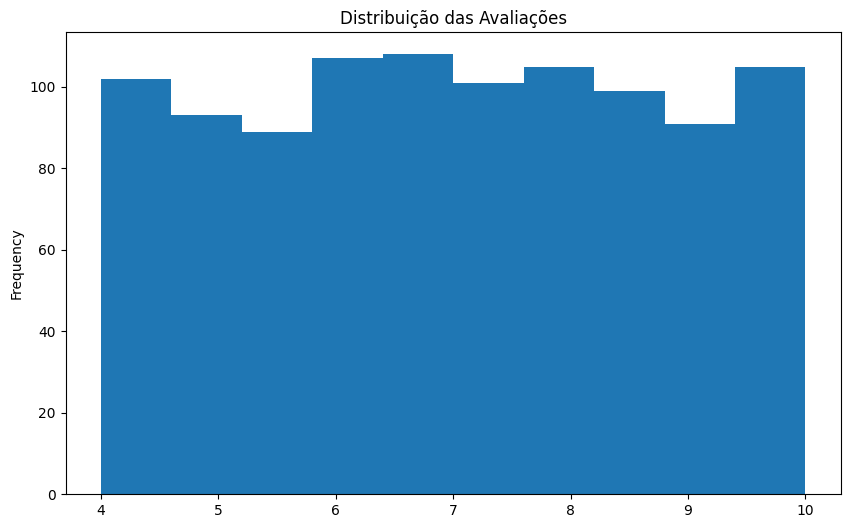

In [24]:
response=query_engine.query('Você pode plotar a distribuição das avaliações?')

In [25]:
response = query_engine.query('Quais filiais têm uma avaliação média acima de 7?')
print(response.response)

> Pandas Instructions:
```
df.loc[df['avaliacao'].mean() > 7, 'filial'].unique()
```
> Pandas Output: There was an error running the output as Python code. Error message: np.False_


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/llama_index/experimental/query_engine/pandas/output_parser.py", line 63, in default_output_processor
    output_str = str(safe_eval(module_end_str, global_vars, local_vars))
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/llama_index/experimental/exec_utils.py", line 159, in safe_eval
    return eval(__source, _get_restricted_globals(__globals), __locals)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/indexing.py", line 1183, in __getitem__
    return self.obj._get_value(*key, takeable=self._takeable)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/frame.py", line 4221, in _get_value
    row = self.index.get_loc(index)
          ^^^^^^^^^^

Não há filiais com avaliação média acima de 7. A avaliação média das filiais é menor ou igual a 7.


> Pandas Instructions:
```
df.boxplot(column='avaliacao', by='filial')
```
> Pandas Output: Axes(0.1,0.15;0.8x0.75)


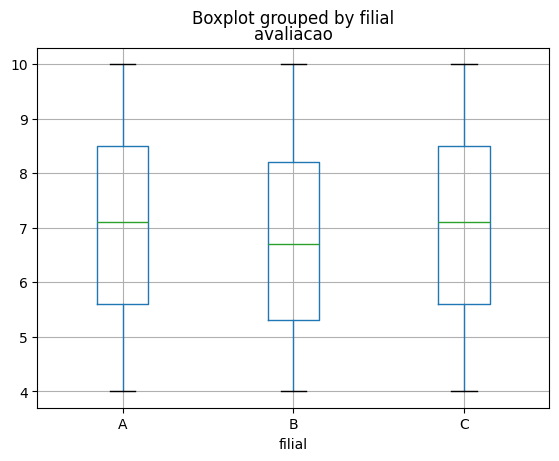

In [26]:
response = query_engine.query('Você pode plotar o boxplot das avaliações por filial?')

In [27]:
response = query_engine.query('Qual é a média de gasto por tipo de cliente?')
synthesize_response=True
print(response.response)

> Pandas Instructions:
```
df.groupby('tipo_cliente')['total'].mean()
```
> Pandas Output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64
A média de gasto por tipo de cliente é a seguinte: 
- Membro: R$ 327,79
- Normal: R$ 318,12.
